# MLTSA vs Feature Permutations

###### *Note that this Jupyter Notebook requires you to have the MLTSA package installed.

As usual with MLTSA experiments we first create the 1D analytical model dataset.

In [2]:
"""First we import our dataset examples"""
from MLTSA_datasets.OneD_pot.OneD_pot_data import potentials #We import the potentials class which will define them.
from MLTSA_datasets.OneD_pot.OneD_pot_data import dataset #We import the dataset class which will hold our potentials.
import matplotlib.pyplot as plt
import numpy as np

#This cell sets the potentials, don't re-run
total_n_pots = 25
n_DW = 5
relevant_DW_n = 2
#After defining the desired parameters we define the potentials accordingly
pots = potentials(total_n_pots, n_DW, relevant_DW_n)
# This creates the first dataset of data.
n_features = 180
degree_of_mixing = 2
#We specified the number of features wanted and how much they will mix
oneD_dataset = dataset(pots, n_features, degree_of_mixing)

Defining Potentials: 100%|############################################################| 25/25 [00:00<00:00, 174.19it/s]


Once the dataset has been created we generate the data we will use over the comparison

In [3]:
"""Now we generate the trajectories we will use for the whole experiment"""
#Generate the trajectories
n_simulations = 100
n_steps = 250
data, ans = oneD_dataset.generate_linear(n_simulations, n_steps)
data_val, ans_val = oneD_dataset.generate_linear(int(n_simulations/2), n_steps)

Classifying Simulation Outcomes: 100%|#########################################################| 50/50 [00:00<?, ?it/s]


Generating dataset
Getting simulation labels for the generated data
Generating dataset
Getting simulation labels for the generated data


In [35]:
from MLTSA_sklearn.models import SKL_Train
from sklearn.neural_network import MLPClassifier
from MLTSA_sklearn.MLTSA_sk import MLTSA

#For loop for MLTSA and Permutation on MLP

time_bins = 50
time_range = np.linspace(0, n_steps, time_bins)

results = {}
results["MLTSA"] = []
results["NN"] = []
results["acc"] = []


for t in range(time_bins-1):

    time_frame = [int(time_range[t]), int(time_range[t+1])]
    X, Y = oneD_dataset.PrepareData(data, ans, time_frame, mode="Normal")
    X_val, Y_val = oneD_dataset.PrepareData(data_val, ans_val, time_frame, mode="Normal")

    NN = MLPClassifier(random_state=0, verbose=False, max_iter=500)
    trained_NN, train_acc, test_acc = SKL_Train(NN, X, Y)

    Y_pred = trained_NN.predict(X_val)
    val_acc = Y_val == Y_pred
    val_acc = np.mean(val_acc)

    ADrop_train_avg = MLTSA(data[:,:,int(time_frame[0]):int(time_frame[1])], ans, trained_NN, drop_mode="Average")

    results["MLTSA"].append(ADrop_train_avg)
    results["NN"].append(trained_NN)
    results["acc"].append([train_acc, test_acc, val_acc])

100it [00:08, 11.39it/s]
100it [00:11,  8.49it/s]
100it [00:11,  8.51it/s]
100it [00:08, 11.90it/s]
100it [00:08, 11.94it/s]
100it [00:08, 11.91it/s]
100it [00:08, 11.85it/s]
100it [00:08, 11.84it/s]
100it [00:08, 12.01it/s]
100it [00:08, 11.86it/s]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
100it [00:08, 12.01it/s]
100it [00:08, 12.06it/s]
100it [00:08, 11.98it/s]
100it [00:08, 12.22it/s]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
100it [00:08, 11.98it/s]
100it [00:08, 12.04it/s]
100it [00:08, 12.27it/s]
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_

Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.15490436553955078 seconds
Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.14990687370300293 seconds
Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.15690398216247559 seconds
Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.1309192180633545 seconds
Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.1349177360534668 seconds
Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.12192440032958984 seconds
Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.30181360244750977 seconds
Accuracy on Train is 62.4
Accuracy on Test set is 61.6
Trained in  2.7562992572784424 seconds
Accuracy on Train is 80.0
Accuracy on Test set is 78.4
Traine

Text(0.5, 0, 'Feature (CV)')

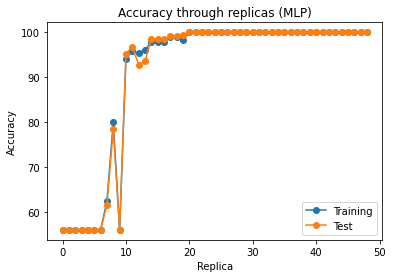

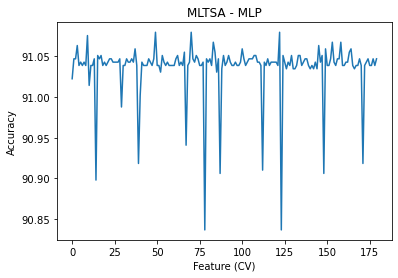

In [36]:
acc = np.array(results["acc"])
adrop = np.array(results["MLTSA"])

plt.figure()
plt.title("Accuracy through replicas (MLP)")
plt.plot(acc.T[0]*100,"-o",  label="Training",)
plt.plot(acc.T[1]*100,"-o", label="Test")
plt.xlabel("Replica")
plt.ylabel("Accuracy")
plt.legend()

std = np.std(adrop, axis=0)*100
mean = np.mean(adrop, axis=0)*100
plt.figure()
plt.title("MLTSA - MLP")
plt.plot(mean)
plt.ylabel("Accuracy")
plt.xlabel("Feature (CV)")

<AxesSubplot:>

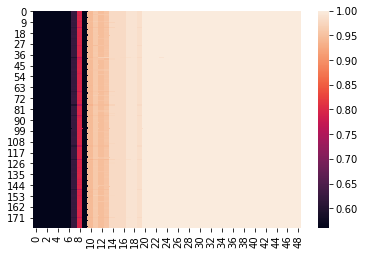

In [37]:
import seaborn as sns
#plt.figure(figsize=(50,5))
#plt.matshow(adrop.T)
sns.heatmap(adrop.T)

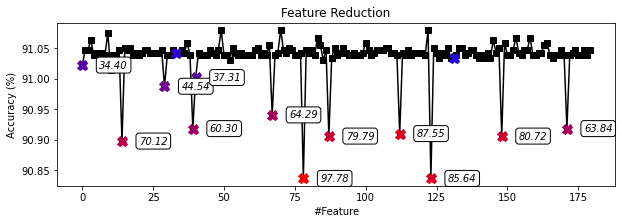

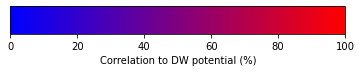

In [38]:
from MLTSA_sklearn.MLTSA_sk import MLTSA_Plot

#We simply get the plot with this
MLTSA_Plot(adrop, oneD_dataset, pots, errorbar=False)

In [39]:
from MLTSA_sklearn.models import SKL_Train
from sklearn.neural_network import MLPClassifier
from MLTSA_sklearn.MLTSA_sk import MLTSA

#For loop for MLTSA and Permutation on MLP

time_bins = 50
time_range = np.linspace(0, n_steps, time_bins)
region = 25

results_d = {}
results_d["MLTSA"] = []
results_d["NN"] = []
results_d["acc"] = []


for t in range(time_bins-1):

    time_frame = [int(time_range[t]), int(time_range[t]+25)]
    X, Y = oneD_dataset.PrepareData(data, ans, time_frame, mode="Normal")
    X_val, Y_val = oneD_dataset.PrepareData(data_val, ans_val, time_frame, mode="Normal")

    NN = MLPClassifier(random_state=0, verbose=False, max_iter=500)
    trained_NN, train_acc, test_acc = SKL_Train(NN, X, Y)

    Y_pred = trained_NN.predict(X_val)
    val_acc = Y_val == Y_pred
    val_acc = np.mean(val_acc)

    ADrop_train_avg = MLTSA(data[:,:,int(time_frame[0]):int(time_frame[1])], ans, trained_NN, drop_mode="Average")

    results_d["MLTSA"].append(ADrop_train_avg)
    results_d["NN"].append(trained_NN)
    results_d["acc"].append([train_acc, test_acc, val_acc])

100it [00:06, 14.34it/s]
100it [00:06, 15.43it/s]
100it [00:07, 13.38it/s]
100it [00:07, 13.91it/s]
100it [00:07, 13.02it/s]
100it [00:07, 12.85it/s]
100it [00:07, 13.49it/s]
100it [00:07, 13.39it/s]
100it [00:08, 12.07it/s]
100it [00:07, 13.24it/s]
100it [00:07, 13.59it/s]
100it [00:07, 13.33it/s]
100it [00:07, 13.33it/s]
100it [00:07, 13.33it/s]
100it [00:07, 13.07it/s]
100it [00:07, 13.28it/s]
100it [00:07, 13.26it/s]
100it [00:07, 13.30it/s]
100it [00:07, 13.12it/s]
100it [00:08, 12.06it/s]
100it [00:07, 12.95it/s]
100it [00:07, 13.00it/s]
100it [00:07, 13.19it/s]
100it [00:07, 12.90it/s]
100it [00:07, 12.95it/s]
100it [00:08, 12.30it/s]
100it [00:08, 12.36it/s]
100it [00:08, 12.41it/s]
100it [00:08, 12.29it/s]
100it [00:07, 13.04it/s]
100it [00:08, 12.47it/s]
100it [00:07, 12.64it/s]
100it [00:07, 12.69it/s]
100it [00:08, 12.50it/s]
100it [00:08, 12.49it/s]
100it [00:08, 12.12it/s]
100it [00:08, 12.50it/s]
100it [00:08, 12.22it/s]
100it [00:07, 12.60it/s]
100it [00:07, 12.89it/s]


Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  1.1372909545898438 seconds
Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.5872805118560791 seconds
Accuracy on Train is 56.00000000000001
Accuracy on Test set is 56.00000000000001
Trained in  0.5698509216308594 seconds
Accuracy on Train is 79.78666666666666
Accuracy on Test set is 81.76
Trained in  8.828275442123413 seconds
Accuracy on Train is 77.81333333333333
Accuracy on Test set is 79.2
Trained in  7.4992356300354 seconds
Accuracy on Train is 84.10666666666667
Accuracy on Test set is 87.68
Trained in  10.61309266090393 seconds
Accuracy on Train is 93.60000000000001
Accuracy on Test set is 92.96
Trained in  9.258954763412476 seconds
Accuracy on Train is 92.58666666666666
Accuracy on Test set is 93.12
Trained in  9.15191102027893 seconds
Accuracy on Train is 95.73333333333333
Accuracy on Test set is 96.16
Trained in  5.80917763710022 seconds
Acc

ValueError: could not broadcast input array from shape (25) into shape (0)

Text(0.5, 0, 'Feature (CV)')

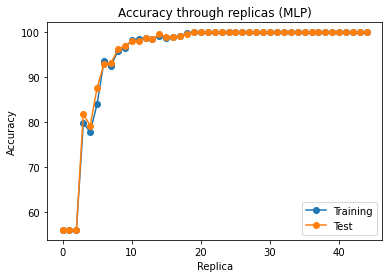

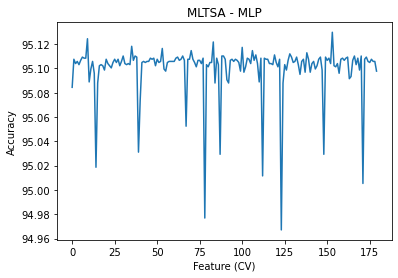

In [40]:
acc = np.array(results_d["acc"])
adrop = np.array(results_d["MLTSA"])

plt.figure()
plt.title("Accuracy through replicas (MLP)")
plt.plot(acc.T[0]*100,"-o",  label="Training",)
plt.plot(acc.T[1]*100,"-o", label="Test")
plt.xlabel("Replica")
plt.ylabel("Accuracy")
plt.legend()

std = np.std(adrop, axis=0)*100
mean = np.mean(adrop, axis=0)*100
plt.figure()
plt.title("MLTSA - MLP")
plt.plot(mean)
plt.ylabel("Accuracy")
plt.xlabel("Feature (CV)")


<AxesSubplot:>

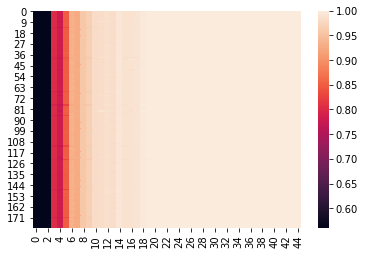

In [58]:
import seaborn as sns
#plt.figure(figsize=(50,5))
#plt.matshow(adrop.T)
sns.heatmap(adrop.T)


0 0.56
0 0.56
0 0.56
78 0.7924000000000001
78 0.772
78 0.8263999999999999
78 0.9264
123 0.9232
40 0.9560000000000002
39 0.96
14 0.9803999999999999
123 0.9795999999999999
123 0.9840000000000001
92 0.982
10 0.9924
39 0.986
39 0.9856
39 0.9840000000000001
123 0.996
123 0.998
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0
0 1.0


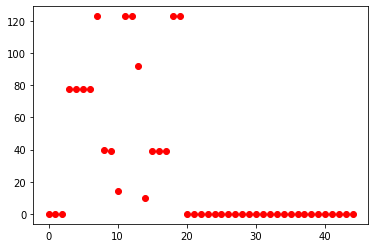

In [70]:
for n,feat in enumerate(adrop):
    print(np.argmin(feat), feat[np.argmin(feat)])
    plt.scatter(n,np.argmin(feat), color="r" )

In [ ]:
plt.figure()
plt.title("MLTSA - MLP")
plt.plot(adrop[0])
plt.ylabel("Accuracy")
plt.xlabel("Feature (CV)")

In [ ]:
obj = CVclass(n_features)